In [1]:
from Chemometrics.import_common import *
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'

In [2]:
# 读取数据
with open('数据汇总.csv') as csv:
    df = pd.read_csv(csv,delimiter='\t')
hplc = df.dropna(axis=1)
LC = hplc.drop(0).set_index('样品名称').loc[:,'1':]
ir = pload('tw20_IR.p')

In [3]:
# 整理数据: 结构化
try:
    LC.index = [re.search('.+(?=-)',idx)[0] for idx in LC.index]
except:pass
lc = LC.groupby(LC.index).mean()
ir.index = ir.index.map(str.lower)
ir = ir.groupby(ir.index).mean()
common_observation = np.intersect1d(ir.index,lc.index)
Y = ir.loc[common_observation] #NIR
X = lc.loc[common_observation] #LC

# 互信息Mutual imformation计算   
 

<h1 style="text-align:center">I(X, Y) = H(X) + H(Y) - H(X,Y) </h1>

在概率论和信息论中，两个随机变量的互信息（Mutual Information，简称MI）或转移信息（transinformation）是变量间相互依赖性的量度。详细可参考[这里](https://zh.wikipedia.org/wiki/%E4%BA%92%E4%BF%A1%E6%81%AF)

计算NIR每个波数的吸光度和LC每个峰之间的互信息，以此来表示NIR和LC之间的联系 

In [4]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest
sk = SelectKBest(mutual_info_regression,1)
mi = []
for peak in X.columns:
    sk.fit(Y,X[peak])
    mi.append(sk.scores_)
MI = pd.DataFrame(mi, index=X.columns, columns=np.round(Y.columns.values))

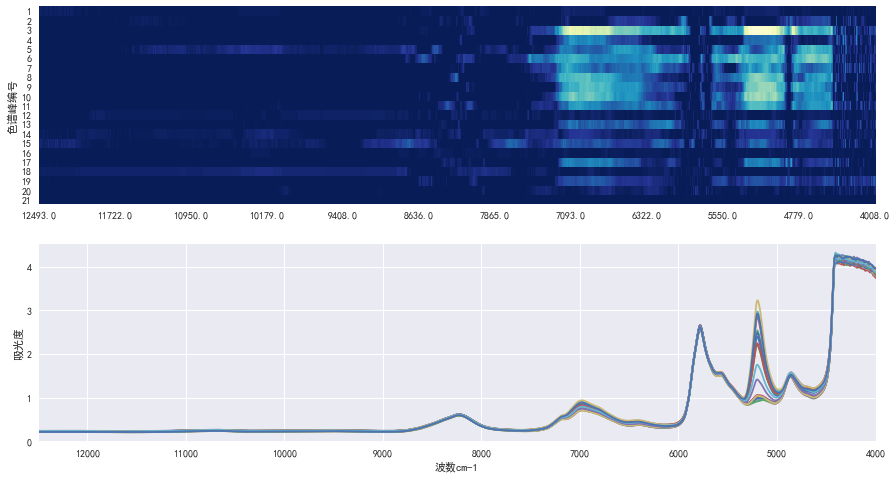

In [18]:
f = plt.figure(figsize=(15,20))
ax1 = f.add_subplot(211)
g = sns.heatmap(MI,xticklabels=200,cmap=plt.cm.YlGnBu_r,ax=ax1,cbar=False)
plt.ylabel('色谱峰编号')
plt.yticks(rotation=0)
ax2 = f.add_subplot(212)
Y.T.plot(figsize=(15,8),legend=False,ax=ax2)
plt.xlabel('波数cm-1')
plt.ylabel('吸光度')
f.savefig('NIR和IR之间的互信息.png',dpi=300)